In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interp
import gzip
import pickle as pkl
%matplotlib inline

In [2]:
# load data
file = gzip.GzipFile('GlobalTemperatureData.pkl.gz','rb')
df = pkl.load(file)
file.close

<bound method GzipFile.close of <gzip _io.BufferedReader name='GlobalTemperatureData.pkl.gz' 0x290913ce730>>

In [4]:
df.keys()
df.values()

dict_values([         i   j  lon  lat  Temperature(i,j)
0        1   1 -179  -89            9999.0
1        2   1 -177  -89            9999.0
2        3   1 -175  -89            9999.0
3        4   1 -173  -89            9999.0
4        5   1 -171  -89            9999.0
...    ...  ..  ...  ...               ...
16195  176  90  171   89            9999.0
16196  177  90  173   89            9999.0
16197  178  90  175   89            9999.0
16198  179  90  177   89            9999.0
16199  180  90  179   89            9999.0

[16200 rows x 5 columns],          i   j  lon  lat  Temperature(i,j)
0        1   1 -179  -89            9999.0
1        2   1 -177  -89            9999.0
2        3   1 -175  -89            9999.0
3        4   1 -173  -89            9999.0
4        5   1 -171  -89            9999.0
...    ...  ..  ...  ...               ...
16195  176  90  171   89            9999.0
16196  177  90  173   89            9999.0
16197  178  90  175   89            9999.0
16198  179  90

In [5]:
YR = list(df.keys())

In [60]:
iyr = 10
df_yr = df[YR[iyr]]

In [62]:
df_yr.keys()

Index(['i', 'j', 'lon', 'lat', 'Temperature(i,j)'], dtype='object')

In [63]:
df_yr

,i,j,lon,lat,"Temperature(i,j)"
0,1,1,-179,-89,9999.0
1,2,1,-177,-89,9999.0
2,3,1,-175,-89,9999.0
3,4,1,-173,-89,9999.0
4,5,1,-171,-89,9999.0
...,...,...,...,...,...
16195,176,90,171,89,9999.0
16196,177,90,173,89,9999.0
16197,178,90,175,89,9999.0
16198,179,90,177,89,9999.0


In [64]:
data = df_yr[['lon','lat','Temperature(i,j)']].to_numpy()

In [65]:
data[np.where(data>999)] = np.nan     # 이상치의 plot 방지

In [66]:
data 

array([[-179.,  -89.,   nan],
       [-177.,  -89.,   nan],
       [-175.,  -89.,   nan],
       ...,
       [ 175.,   89.,   nan],
       [ 177.,   89.,   nan],
       [ 179.,   89.,   nan]])

In [67]:
# grid
x = np.linspace(-180,180,100)
y = np.linspace(-90,90,100)
grid_x, grid_y = np.meshgrid(x,y)

In [68]:
# data interpolate
data_interp = interp.griddata(data[:,[0,1]], data[:,2],(grid_x, grid_y), method='linear')

<ipython-input-69-163ef13eeaca>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid_x, grid_y, data_interp,cmap='coolwarm',alpha=0.6)


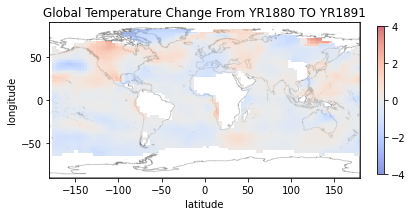

In [69]:
# plot
hfig, hax = plt.subplots()
im = plt.imread('world_map.png')
plt.imshow(np.flipud(im), origin='lower', extent=(-180,180,-90,90))
plt.pcolormesh(grid_x, grid_y, data_interp,cmap='coolwarm',alpha=0.6)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.title('Global Temperature Change From YR1880 TO '+ str(YR[iyr]))
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.colorbar(fraction=0.022,pad=0.05)
plt.clim(-4,4)


# Animate Graph


In [ ]:
import matplotlib.animation

plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['figure.dpi'] = 150
plt.ioff()

hfig, hax = plt.subplots()

def animate(iyr):
    df_yr = df[YR[iyr]]